<table style="width:100%;">
  <tr style="border-bottom: 3px solid #ddd;">
    <td style="text-align:left;">ECE 387: Introduction to Robotic Systems</td>
    <td style="text-align:right;">Spring 2018</td>
  </tr>
  <tr>
    <td style="text-align:left;"><h1>Homework 6: Image Processing</h1></td>
    <td style="text-align:right;"><img src="http://www.imagenspng.com.br/wp-content/uploads/2015/07/minions-02.png" width=100px align="right"></td>
  </tr>
</table>

blah

---

In [53]:
# import libraries
%matplotlib inline
from __future__ import print_function, division
import numpy as np
from matplotlib import pyplot as plt
import cv2
import pylab # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

1: As shown in class, open your camera, grab, and display a camera image (remember to change the color space from BRG to RGB so the image looks correct). Also print out the size of the image.

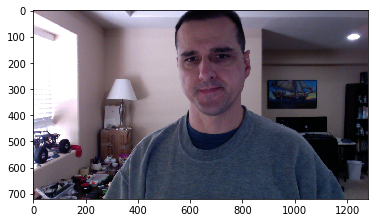

In [7]:
cap = cv2.VideoCapture(0)
ret, frame = cap.read()
if ret:
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(frame)

cap.release()

2: As shown in class, use the canny edge detector and display edges on your image.

3: Make a 1x2 plot where your camera images is:

- Left image: rotated counter clockwise 90 degrees
- Right image: invert image

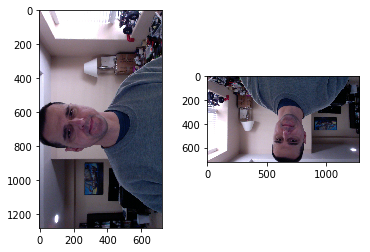

In [13]:
plt.subplot(1,2,1)
plt.imshow(cv2.transpose(frame))

plt.subplot(1,2,2)
plt.imshow(cv2.flip(frame, 0))

4: Find your face in the image and crop out everything but it (*hint: ROI*). Then plot just your face.

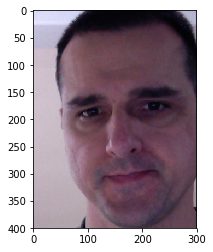

In [22]:
im = frame[0:400, 500:800]
plt.imshow(im);

5: Now take your image and histogram equalize it. For both the original and the equalized image:

- plot the histogram for the red, green, and blue channels
- plot the image

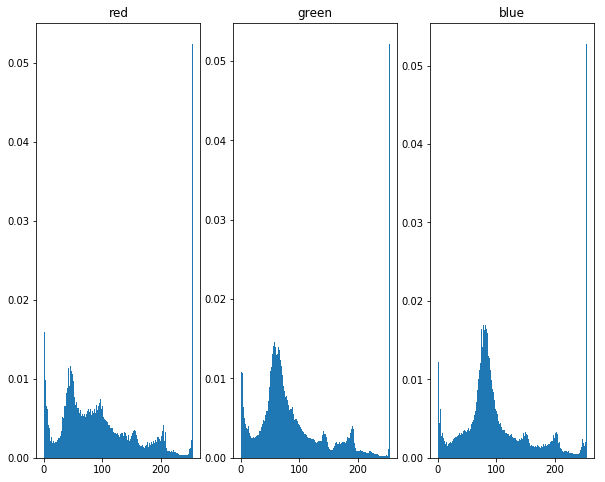

In [62]:
def Hist(image):
    r,g,b = cv2.split(image)

    plt.subplot(1,3,1)
    plt.hist(r.ravel(), bins=256, normed=True)
    plt.title('red')

    plt.subplot(1,3,2)
    plt.hist(g.ravel(), bins=256, normed=True)
    plt.title('green')

    plt.subplot(1,3,3)
    plt.hist(b.ravel(), bins=256, normed=True)
    plt.title('blue');
    
# def ImageHist(image):
# #     plt.subplot(1,2,1)
#     plt.imshow(image)
    
# #     plt.subplot(1,2,2)
# #     Hist(image);

Hist(frame)

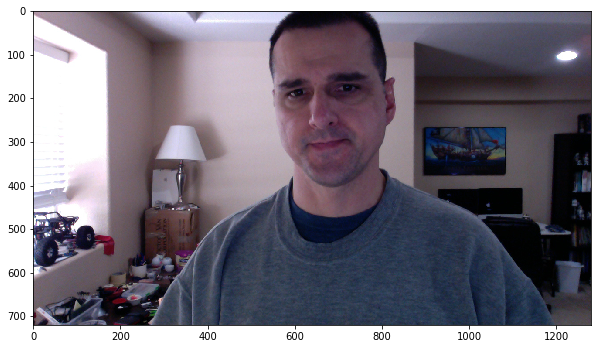

In [64]:
plt.imshow(frame);

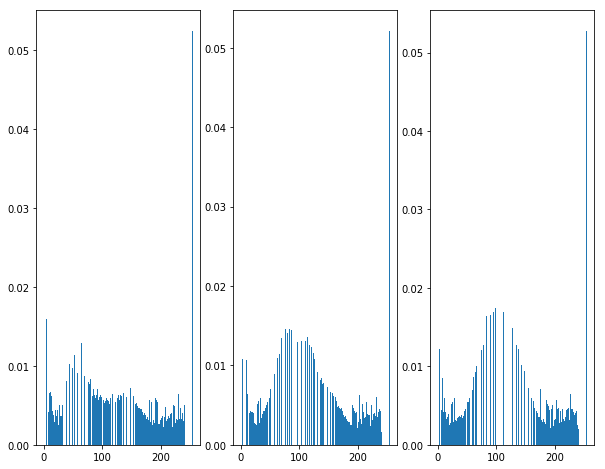

In [65]:
er = cv2.equalizeHist(r)
plt.subplot(1,3,1)
plt.hist(er.ravel(), bins=256, normed=True);

eg = cv2.equalizeHist(g)
plt.subplot(1,3,2)
plt.hist(eg.ravel(), bins=256, normed=True);

eb = cv2.equalizeHist(b)
plt.subplot(1,3,3)
plt.hist(eb.ravel(), bins=256, normed=True);

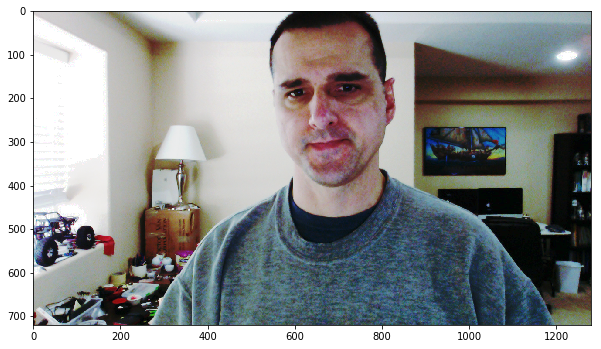

In [66]:
equ = cv2.merge((er,eg,eb))
plt.imshow(equ)

This is how ravel works:

In [29]:
x = np.array([[1, 2, 3], [4, 5, 6]])
print(np.ravel(x))

[1 2 3 4 5 6]


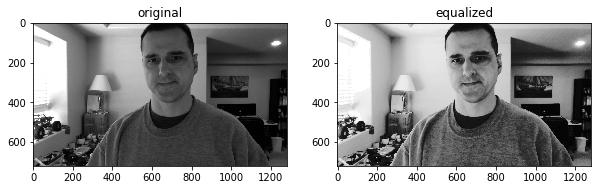

In [89]:
# turn original to grayscale
gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

# histogram equalize grayscale
egray = cv2.equalizeHist(gray)

plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title('original')

plt.subplot(1,2,2)
plt.imshow(egray, cmap='gray')
plt.title('equalized');

In [69]:
# translate
M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(frame,M, frame.shape)
plt.imshow(dst)

TypeError: function takes exactly 2 arguments (3 given)

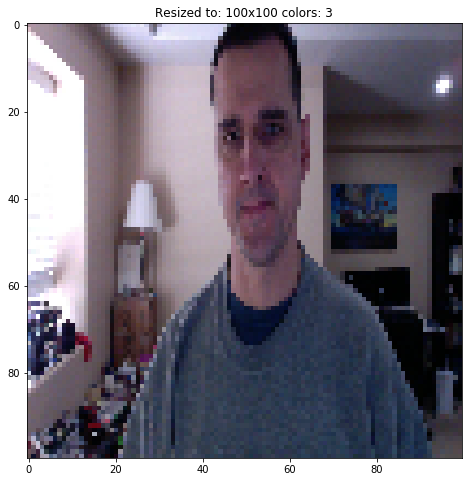

In [91]:
dst = cv2.resize(frame, (100,100))
plt.imshow(dst);
plt.title('Resized to: {}x{} colors: {}'.format(*dst.shape));

In [83]:
from math import sin, cos, pi
angle = pi/2
M = np.float32([[cos(angle), -sin(angle)],[sin(angle), cos(angle)]])
dst = cv2.warpAffine(src=frame,M=M, dsize=(500,500))
plt.imshow(dst)

error: /tmp/opencv3-20170812-25766-o4y1ob/opencv-3.3.0/modules/imgproc/src/imgwarp.cpp:5889: error: (-215) (M0.type() == CV_32F || M0.type() == CV_64F) && M0.rows == 2 && M0.cols == 3 in function warpAffine


Third argument of the cv2.warpAffine(image, Matrix, output_size) function is the size of the output image, which should be in the form of **(width, height)**. Remember width = number of columns, and height = number of rows.

In [86]:
print(frame.shape)
M = cv2.getRotationMatrix2D((100,100),90,1)
dst = cv2.transform(gray, M)
print(dst.shape)
plt.imshow(dst);

(720, 1280, 3)


error: /tmp/opencv3-20170812-25766-o4y1ob/opencv-3.3.0/modules/core/src/matmul.cpp:2119: error: (-215) scn == m.cols || scn + 1 == m.cols in function transform


getRotationMatrix2D(center, angle, scale)

- center: Center of the rotation in the source image
- angle: Rotation angle in degrees. Positive values mean counter-clockwise rotation (the coordinate origin is assumed to be the top-left corner)
- scale: Isotropic scale factor

In [80]:
help(cv2.getRotationMatrix2D)

Help on built-in function getRotationMatrix2D:

getRotationMatrix2D(...)
    getRotationMatrix2D(center, angle, scale) -> retval
    .   @brief Calculates an affine matrix of 2D rotation.
    .   
    .   The function calculates the following matrix:
    .   
    .   \f[\begin{bmatrix} \alpha &  \beta & (1- \alpha )  \cdot \texttt{center.x} -  \beta \cdot \texttt{center.y} \\ - \beta &  \alpha &  \beta \cdot \texttt{center.x} + (1- \alpha )  \cdot \texttt{center.y} \end{bmatrix}\f]
    .   
    .   where
    .   
    .   \f[\begin{array}{l} \alpha =  \texttt{scale} \cdot \cos \texttt{angle} , \\ \beta =  \texttt{scale} \cdot \sin \texttt{angle} \end{array}\f]
    .   
    .   The transformation maps the rotation center to itself. If this is not the target, adjust the shift.
    .   
    .   @param center Center of the rotation in the source image.
    .   @param angle Rotation angle in degrees. Positive values mean counter-clockwise rotation (the
    .   coordinate origin is assumed to

In [81]:
help(cv2.transform)

Help on built-in function transform:

transform(...)
    transform(src, m[, dst]) -> dst
    .   @brief Performs the matrix transformation of every array element.
    .   
    .   The function cv::transform performs the matrix transformation of every
    .   element of the array src and stores the results in dst :
    .   \f[\texttt{dst} (I) =  \texttt{m} \cdot \texttt{src} (I)\f]
    .   (when m.cols=src.channels() ), or
    .   \f[\texttt{dst} (I) =  \texttt{m} \cdot [ \texttt{src} (I); 1]\f]
    .   (when m.cols=src.channels()+1 )
    .   
    .   Every element of the N -channel array src is interpreted as N -element
    .   vector that is transformed using the M x N or M x (N+1) matrix m to
    .   M-element vector - the corresponding element of the output array dst .
    .   
    .   The function may be used for geometrical transformation of
    .   N -dimensional points, arbitrary linear color space transformation (such
    .   as various kinds of RGB to YUV transforms), shufflin